In [43]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
df = pd.read_csv("hotels_data.csv")

from datetime import datetime
from dateutil.parser import parse

#parsing string to date time format
def get_datetime(date_str):
    return datetime.strptime(date_str, '%m/%d/%Y %H:%M')

df["DayDiff"] = DataFrame([get_datetime(val) for val in df["Checkin Date"]]) - DataFrame([get_datetime(val) for val in df["Snapshot Date"]])
df["WeekDay"] = DataFrame([get_datetime(val).weekday() for val in df["Checkin Date"]])
df["DiscountDiff"] = df["Original Price"] - df["Discount Price"]
df["DiscountPerc"] = (df["DiscountDiff"]/df["Original Price"]) * 100

df

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,DayDiff,WeekDay,DiscountDiff,DiscountPerc
0,1,7/17/2015 0:00,8/12/2015 0:00,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,26 days,2,138,11.714771
1,1,7/17/2015 0:00,8/19/2015 0:00,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,33 days,2,131,11.769991
2,1,7/17/2015 0:00,8/13/2015 0:00,5,4370,4240,1,3,The Peninsula New York,5,27 days,3,130,2.974828
3,1,7/17/2015 0:00,7/26/2015 0:00,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,9 days,6,72,4.140311
4,1,7/17/2015 0:00,8/12/2015 0:00,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,26 days,2,67,3.852789
5,1,7/17/2015 0:00,8/7/2015 0:00,5,1436,1345,1,9,Grand Hyatt New York,4,21 days,4,91,6.337047
6,1,7/17/2015 0:00,8/9/2015 0:00,5,1616,1525,1,5,Grand Hyatt New York,4,23 days,6,91,5.631188
7,1,7/17/2015 0:00,8/12/2015 0:00,5,1256,1183,1,5,Grand Hyatt New York,4,26 days,2,73,5.812102
8,1,7/17/2015 0:00,8/13/2015 0:00,5,1256,1201,1,54,Grand Hyatt New York,4,27 days,3,55,4.378981
9,1,7/17/2015 0:00,7/22/2015 0:00,5,1689,1489,1,-1,Hilton New York Fashion District,4,5 days,2,200,11.841326


## Top 150 common hotels 

In [44]:
#counting and sorting by common hotel name
df["Hotel_Count"] = df.groupby('Hotel Name')['Hotel Name'].transform('count')
df=df.sort_values(by=['Hotel_Count'],ascending=False).reset_index()

#getting first 150 hotels  
df_hotels = df["Hotel Name"].unique()[:150]
most_common_hotels = df[df['Hotel Name'].isin(df_hotels)]





## Top 40 checkins contain most lists 

In [45]:


#counting and sorting by common checking_data
most_common_hotels["Checkin_Count"] = most_common_hotels.groupby('Checkin Date')['Checkin Date'].transform('count')
most_common_hotels = most_common_hotels.sort_values(by=['Checkin_Count'],ascending=False).reset_index()

#getting first 40 checkins  
common_checkins_list = most_common_hotels["Checkin Date"].unique()[:40]
most_checkins = most_common_hotels[most_common_hotels['Checkin Date'].isin(common_checkins_list)]




C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## Checkin - Hotel - Discount Code 

In [46]:
unique_hotels_names = most_checkins["Hotel Name"].unique()
unique_checkins =  most_checkins["Checkin Date"].unique()
unique_discount_code =  [1,2,3,4]

#creating default data - all combination : checking -hotel - discount code
import itertools
import sys
combs = []
for x in unique_hotels_names:
    for y in unique_checkins:
        for z in unique_discount_code:
            combs.append([x, y,z,sys.maxsize])

#converting the default data to data frame and appending to exist
new_df =  DataFrame.from_records(combs,columns=["Hotel Name","Checkin Date","Discount Code","Discount Price"])
most_checkins = most_checkins.append(new_df)

#finding minimum  discount price outa  hotel name - checking date - discount code group and fixing data
most_checkins["Discount Price"]= most_checkins.groupby(['Hotel Name','Checkin Date','Discount Code'])["Discount Price"].transform('min')
most_checkins.drop_duplicates(subset=["Hotel Name","Checkin Date","Discount Code"], inplace=True)
most_checkins.sort_values(by=["Hotel Name","Checkin Date","Discount Code"],ascending=True,inplace=True)
most_checkins['Discount Price'].replace(sys.maxsize, -1, inplace=True)

#taking only needed data
checkin_hotel_discount = most_checkins[["Hotel Name","Checkin Date","Discount Code","Discount Price"]].reset_index()
checkin_hotel_discount 



C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,index,Hotel Name,Checkin Date,Discount Code,Discount Price
0,16740,Aloft Harlem,10/1/2015 0:00,1,-1
1,16741,Aloft Harlem,10/1/2015 0:00,2,-1
2,16742,Aloft Harlem,10/1/2015 0:00,3,-1
3,16743,Aloft Harlem,10/1/2015 0:00,4,-1
4,3600,Aloft Harlem,10/14/2015 0:00,1,1381
5,16645,Aloft Harlem,10/14/2015 0:00,2,-1
6,4129,Aloft Harlem,10/14/2015 0:00,3,1164
7,16647,Aloft Harlem,10/14/2015 0:00,4,-1
8,16712,Aloft Harlem,10/15/2015 0:00,1,-1
9,16713,Aloft Harlem,10/15/2015 0:00,2,-1


## Normalization of data 

In [55]:
#normalizing only positive numbers, ignoring -1 values
discount_filtered = checkin_hotel_discount[checkin_hotel_discount['Discount Price'] > -1 ]
discount_filtered_grouped = discount_filtered.groupby('Hotel Name')['Discount Price']
discount_filtered["Normal"] = discount_filtered_grouped.transform(lambda x: round((x - min(x) ) / ( max(x) - min(x) ) * 100) ) 

discount_synth = checkin_hotel_discount[checkin_hotel_discount['Discount Price'] == -1 ]
discount_synth["Normal"] = -1


#checkin_hotel_discount
normal_dataFrame = discount_synth.append(discount_filtered)
normal_dataFrame.sort_values(by=["Hotel Name","Checkin Date","Discount Code"],ascending=True,inplace=True)
normal_dataFrame

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,index,Hotel Name,Checkin Date,Discount Code,Discount Price,Normal
0,16740,Aloft Harlem,10/1/2015 0:00,1,-1,-1.0
1,16741,Aloft Harlem,10/1/2015 0:00,2,-1,-1.0
2,16742,Aloft Harlem,10/1/2015 0:00,3,-1,-1.0
3,16743,Aloft Harlem,10/1/2015 0:00,4,-1,-1.0
4,3600,Aloft Harlem,10/14/2015 0:00,1,1381,72.0
5,16645,Aloft Harlem,10/14/2015 0:00,2,-1,-1.0
6,4129,Aloft Harlem,10/14/2015 0:00,3,1164,32.0
7,16647,Aloft Harlem,10/14/2015 0:00,4,-1,-1.0
8,16712,Aloft Harlem,10/15/2015 0:00,1,-1,-1.0
9,16713,Aloft Harlem,10/15/2015 0:00,2,-1,-1.0


## Columns to vectors

In [56]:
#building list out of each value of hotel name
rows = []
def createRow(x):    
    new_list = x.tolist()
    new_list.insert(0,x.name)
    rows.append(new_list)
    
#converting the list to multi-columns data frame
normal_dataFrame.groupby("Hotel Name")["Normal"].transform( createRow )
vector = pd.DataFrame.from_records(rows)



## Clustering

In [57]:
#filling missing data with 0 
vector_noNan =  vector.fillna(0)
import math
for list1 in vector_noNan.values[:,1:160]:
    for value in list1:
        if not np.isfinite(value):
            print(list1)
            
        
    

## Building Hierarchical  Clustering 

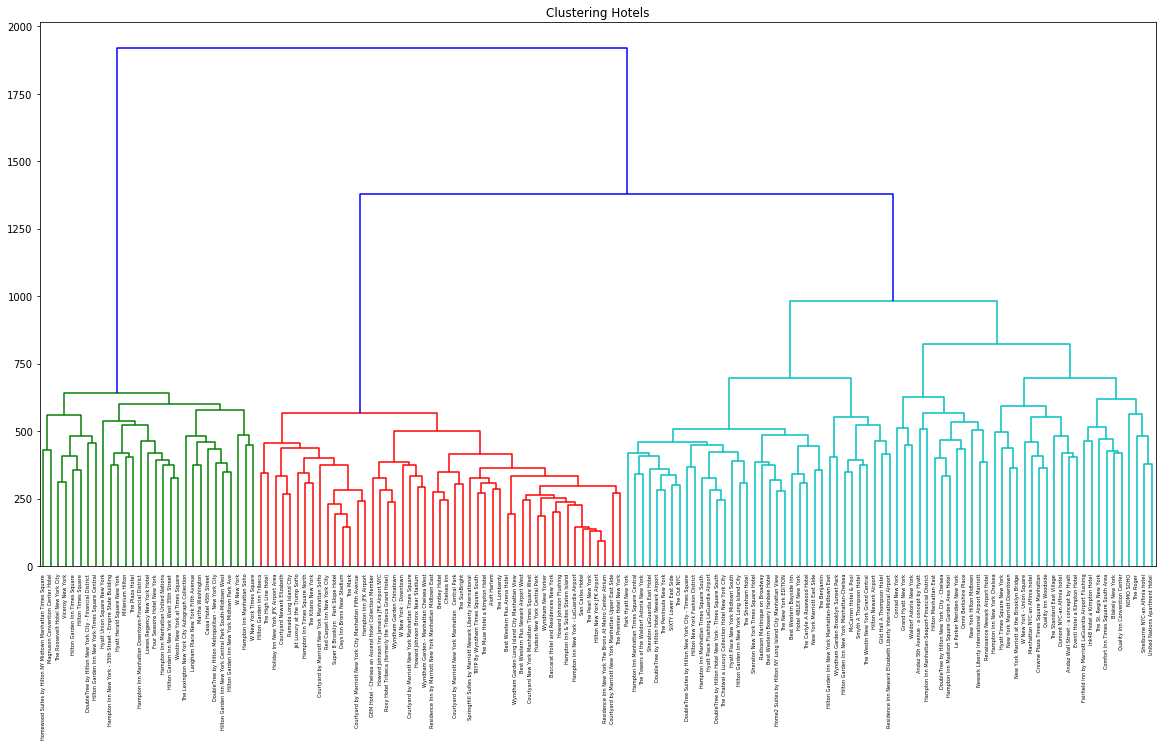

In [58]:
#importing clustering libaries 
from scipy.cluster.hierarchy import dendrogram, linkage 
from matplotlib import pyplot as plt
from scipy import cluster
shc = cluster.hierarchy

#preproccesing data for clustering
labels = vector_noNan.values[:,0]
data = vector_noNan.values[:,1:160]
plt.figure(figsize=(20, 10))  
plt.title("Clustering Hotels")  
Z = shc.linkage(data, method='ward')
dend = shc.dendrogram(Z, labels=labels) 
#plt.show(dend)



In [51]:
#3 clusters seems the best choise
cut1 = shc.cut_tree(Z,n_clusters=3)




array([[0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [2],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [2],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [2],
       [2],
       [1],
       [1],
       [2],
       [1],
       [2],
       [0],
       [1],
       [0],
       [2],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [0],
       [1],
       [1],
       [0],
       [1],
       [2],
       [0],
       [1],
       [2],
       [1],
       [0],
       [0],
       [0],
       [0],
       [2],
       [1],
       [1],
       [1],
       [2],
       [0],
       [2],
       [1],
       [2],
       [2],
       [1],
       [2],
    

## Hotel to cluster

In [60]:
from sklearn.cluster import AgglomerativeClustering

#running the algorithem again in a diffrent way
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
clusters = cluster.fit_predict(vector_noNan.values[:,1:160])  

hotels = pd.DataFrame.from_records(vector_noNan.values)

hotels["cluster"] = clusters
hotels = hotels[[0,"cluster"]]
hotels.sort_values(by=["cluster"],ascending=True,inplace=True)

hotels["Count"] = hotels.groupby("cluster")[0].transform("count")
hotels

,0,cluster,Count
74,Hyatt Times Square New York,0,71
93,Quality Inn Convention Center,0,71
92,Park Hyatt New York,0,71
91,Omni Berkshire Place,0,71
90,Newark Liberty International Airport Marriott,0,71
89,New York Marriott at the Brooklyn Bridge,0,71
88,New York Marriott East Side,0,71
87,New York Marriott Downtown,0,71
86,New York Hilton Midtown,0,71
85,NOMO SOHO,0,71


## Displaying clustering in scatter graph

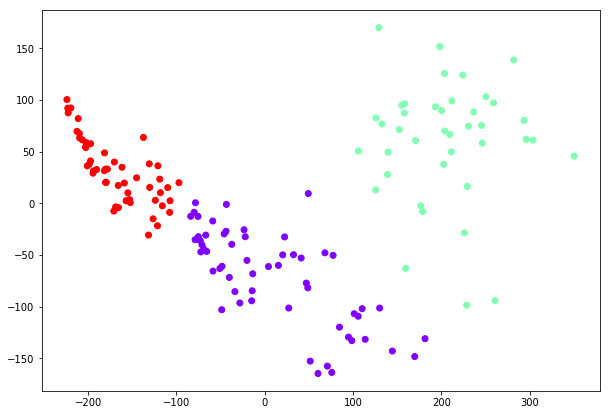

In [53]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


pca = PCA(n_components=2).fit(data)
pca_2d = pca.transform(data)

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(pca_2d)  

plt.figure(figsize=(10, 7))  
plt.scatter(pca_2d[:,0],pca_2d[:,1],c=cluster.labels_, cmap='rainbow')  
